## Task 4

 Name : Tanishq Tajne
 College : Pimpri Chinchwad College of Engineering
 
 Build an AI model that can classify SMS messages as spam or
 legitimate. Use techniques like TF-IDF or word embeddings with
 classifiers like Naive Bayes, Logistic Regression, or Support Vector
 Machines to identify spam messages

### Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

### Data Exploration

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1', engine = "python", usecols = ['v1','v2'])

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.size

11144

In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
## Renaming columns for better understanding
df.columns = ["label","messages"]

In [9]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().values.any()

np.False_

In [11]:
## filtering duplicated values
if df.duplicated().values.any():
    print(df.duplicated().sum())

403


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,label,messages
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [14]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Visualization

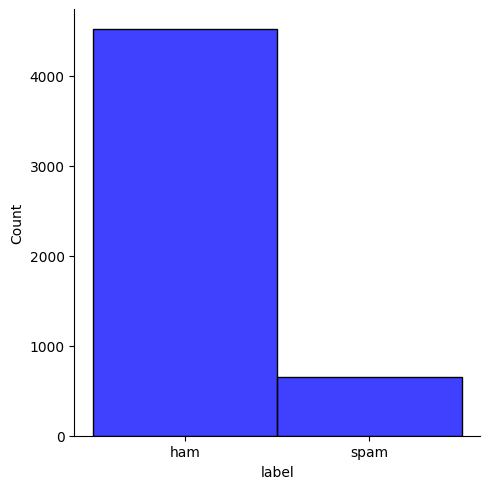

In [15]:
sns.displot(df.label, color = "blue")

### Data Processing

In [16]:
## Encoding categorical variable to numeric values
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"].values)

In [17]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
## TF-IDF Vectorisation
vectorizer = TfidfVectorizer()

In [19]:
## Converting to vectors
X = vectorizer.fit_transform(df["messages"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 8672))

In [20]:
y = df["label"]

#### Pie chart of ham and spam data

In [21]:
p = len(df[df["label"] == 0])
k = len(df[df["label"] == 1])

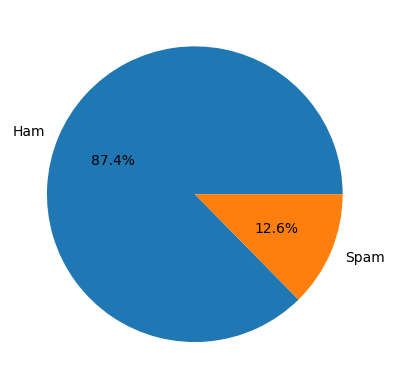

In [22]:
label = np.array(["Ham", "Spam"])
values = np.array([p,k])
plt.pie(values, labels=label, autopct="%.1f%%")
plt.show()

### Implementing Models

In [23]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

#### Naive Bayes Classifier

In [24]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Naive Bayes Model:
[[898   0]
 [ 56  80]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       898
           1       1.00      0.59      0.74       136

    accuracy                           0.95      1034
   macro avg       0.97      0.79      0.86      1034
weighted avg       0.95      0.95      0.94      1034

Accuracy:  0.9458413926499033
r2_Score:  0.5258744923359098
Precision_score:  1.0
Recall_score:  0.5882352941176471
f1_score:  0.7407407407407407


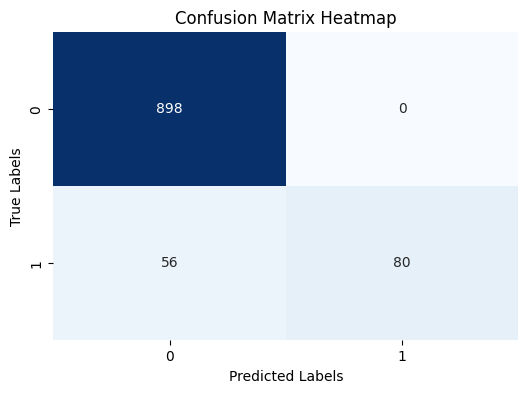

In [25]:
# Make predictions
nb_predictions = naive_bayes_model.predict(X_test)

# Metrics
print("Naive Bayes Model:")
cm = confusion_matrix(y_test, nb_predictions)
print(cm)
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))
print("Precision_score: ", precision_score(y_test, nb_predictions))
print("Recall_score: ", recall_score(y_test, nb_predictions))
print("f1_score: ", f1_score(y_test, nb_predictions))

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### Logistic Regression

In [26]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Logistic Regression Model:
[[898   0]
 [ 46  90]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       898
           1       1.00      0.66      0.80       136

    accuracy                           0.96      1034
   macro avg       0.98      0.83      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6105397615616401
Precision_score:  1.0
Recall_score:  0.6617647058823529
f1_score:  0.7964601769911505


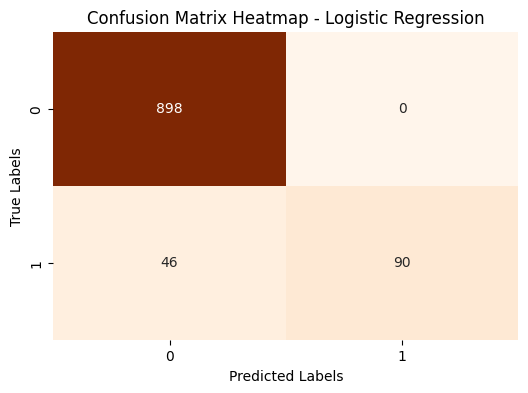

In [27]:
# Predictions
lr_predictions = logistic_regression_model.predict(X_test)

# Evaluation
print("Logistic Regression Model:")
cm = confusion_matrix(y_test, lr_predictions)
print(cm)
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

# Optional: Remove r2_score if not using for regression
try:
    print("r2_Score: ", r2_score(y_test, lr_predictions))  # Not meaningful for classification
except Exception as e:
    print("r2_Score Error:", e)

print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### Support Vector Machine

In [28]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Support Vector Machine (SVM) Model:
[[897   1]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       898
           1       0.99      0.87      0.93       136

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9816247582205029
r2_Score:  0.8391359884711123
Precision_score:  0.9915966386554622
Recall_score:  0.8676470588235294
f1_score:  0.9254901960784314


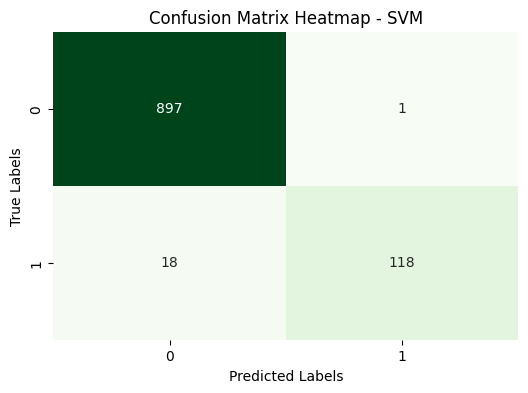

In [29]:
# SVM Predictions
svm_predictions = svm_model.predict(X_test)

# Evaluation
print("Support Vector Machine (SVM) Model:")
cm = confusion_matrix(y_test, svm_predictions)
print(cm)
print(classification_report(y_test, svm_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_predictions))

# ⚠️ r2_score is not ideal for classification tasks
try:
    print("r2_Score: ", r2_score(y_test, svm_predictions))
except Exception as e:
    print("r2_Score Error:", e)

print("Precision_score: ", precision_score(y_test, svm_predictions))
print("Recall_score: ", recall_score(y_test, svm_predictions))
print("f1_score: ", f1_score(y_test, svm_predictions))

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix Heatmap - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()